In [346]:
import pandas as pd #CSV LOADING
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

import random
from random import randrange

import numpy as np

import sys

import h5py

import os

from tensorflow import keras


from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [329]:
wine_test = pd.read_csv('wine_test.csv')
wine_test = wine_test.replace(np.NaN,wine_train.mean())
wine_train = pd.read_csv('wine_train.csv')
wine_train = wine_train.replace(np.NaN,wine_train.mean())
normalized_wine_test=(wine_test-wine_test.min())/(wine_test.max()-wine_test.min())
normalized_wine_train=(wine_train-wine_train.min())/(wine_train.max()-wine_train.min())

In [249]:
# #//////////////////////////////////////////TEST
# #Before normalization

# print("\nBefore normalization")
# print("\nAverage values from Wine test:\n")
# print(wine_test.median(axis='index'))
# print("\nStandard deviations from Wine test:\n")
# print(wine_test.std(axis='index'))

# print("---------------------------------")
# #After normalization
# print("\nAfter normalization")
# print("\nAverage values from Wine test:\n")
# print(normalized_wine_test.median(axis='index'))
# print("\nStandard deviations from Wine test:\n")
# print(normalized_wine_test.std(axis='index'))

# plt.hist(wine_test.loc[:,'citric acid'],bins=105,label='Before normalization',alpha=0.8,color='b')
# plt.hist(normalized_wine_test.loc[:,'citric acid'],bins=105,label='After normalization',alpha=0.5,color='r')
# plt.legend(loc='best')
# plt.show()

# plt.hist(wine_test.loc[:,'chlorides'],bins=500,label='Before normalization',alpha=0.8,color='b')
# plt.hist(normalized_wine_test.loc[:,'chlorides'],bins=105,label='After normalization',alpha=0.5,color='r')
# plt.legend(loc='best')
# plt.show()

# #//////////////////////////////////////////TRAIN
# #Before normalization
# print("TRAIN DATA\n")
# print("\nBefore normalization")
# print("\nAverage values from Wine train:\n")
# print(wine_train.mean(axis='index'))
# print("\nStandard deviations from Wine train:\n")
# print(wine_train.std(axis='index'))

# print("---------------------------------")
# #After normalization
# print("\nAfter normalization")
# print("\nAverage values from Wine train:\n")
# print(normalized_wine_train.mean(axis='index'))
# print("\nStandard deviations from Wine train:\n")
# print(normalized_wine_train.std(axis='index'))

# plt.hist(wine_train.loc[:,'citric acid'],bins=105,label='Before normalization',alpha=0.8,color='b')
# plt.hist(normalized_wine_train.loc[:,'citric acid'],bins=105,label='After normalization',alpha=0.5,color='r')
# plt.legend(loc='best')
# plt.show()

# plt.hist(wine_train.loc[:,'chlorides'],bins=500,label='Before normalization',alpha=0.8,color='b')
# plt.hist(normalized_wine_test.loc[:,'chlorides'],bins=105,label='After normalization',alpha=0.5,color='r')
# plt.legend(loc='best')
# plt.show()

In [250]:
# # RANDOMIZER
# x=0
# y=0
# for z in range(100):
#     for i in range(len(wine_test)):
#         value = wine_train['quality'].iloc[i]
# #        if(np.random.choice(np.arange(0,2), p=[0.3658,0.6342]) == value):
#         if(np.random.choice(np.arange(0,2), p=[0.5,0.5]) == value):
#             x+=1
#     y = y + x
# print(x/len(wine_test))
# print("1 = ",round(x/(x+y),4),"0 = ",round(y/(x+y),4))
# #vyskyt 1 = 0.6342 , 0 = 0.3658 z wine_train
# print(wine_test.sample(10))

In [251]:
# #Logistic regression
# import scipy
# from scipy.stats import spearmanr

# from pylab import rcParams
# import seaborn as sb

# import sklearn 
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import scale
# from sklearn import metrics
# from sklearn import preprocessing
# from sklearn.metrics import classification_report


#X = wine_test.loc[:, wine_test.columns != 'quality']
# X = scale(X)
#y = wine_test['quality']
# LogReg = LogisticRegression()
# LogReg.fit(X, y)
# print(LogReg.score(X, y)) # 0.75 nice
# y_pred = LogReg.predict(X)
# print(classification_report(y, y_pred))

Epoch 1/2000
70/70 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.6864 - val_loss: 0.5896 - val_accuracy: 0.6662

Epoch 00001: val_accuracy improved from -inf to 0.66615, saving model to bestModel7.hdf5
Epoch 2/2000
70/70 [==============================] - 0s 667us/step - loss: 0.5336 - accuracy: 0.7258 - val_loss: 0.5354 - val_accuracy: 0.7269

Epoch 00002: val_accuracy improved from 0.66615 to 0.72692, saving model to bestModel7.hdf5
Epoch 3/2000
70/70 [==============================] - 0s 725us/step - loss: 0.5209 - accuracy: 0.7404 - val_loss: 0.5419 - val_accuracy: 0.7246

Epoch 00003: val_accuracy did not improve from 0.72692
Epoch 4/2000
70/70 [==============================] - 0s 667us/step - loss: 0.5161 - accuracy: 0.7410 - val_loss: 0.5620 - val_accuracy: 0.7185

Epoch 00004: val_accuracy did not improve from 0.72692
Epoch 5/2000
70/70 [==============================] - 0s 667us/step - loss: 0.5124 - accuracy: 0.7429 - val_loss: 0.6354 - val_accu

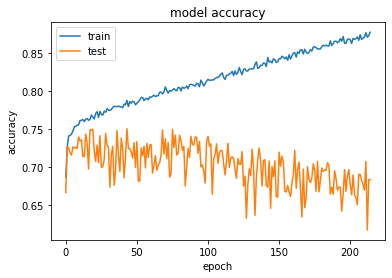

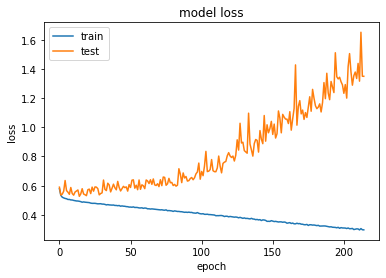

Confusion matrix : 
 [[664 153]
 [172 311]]


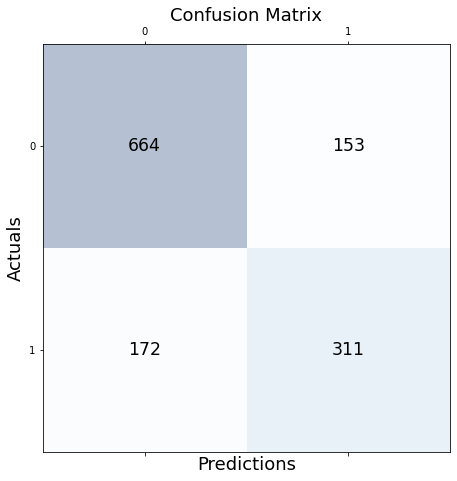

Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.81      0.80       817
           0       0.67      0.64      0.66       483

    accuracy                           0.75      1300
   macro avg       0.73      0.73      0.73      1300
weighted avg       0.75      0.75      0.75      1300



In [429]:
trainX = normalized_wine_train.loc[:, normalized_wine_train.columns != 'quality'].values
trainY = np.int64(normalized_wine_train['quality'].values)
testX = normalized_wine_test.loc[:, normalized_wine_test.columns != 'quality'].values
testY = np.int64(normalized_wine_test['quality'].values)

# # # print(wine_train['type'])
# # #print(np.int64(normalized_wine_train['type']))
# # print(trainY)
# print(trainX.dtype)
# print(trainY.dtype)
# # print(np.info(testY))
# print(testX.dtype)
# print(testY.dtype)

# print("//////////////////////////")
# X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# print(X)
# print(y)
# # split into train and test
# n_train = 50
# trainX, testX = X[:n_train, :], X[n_train:, :]
# trainy, testy = y[:n_train], y[n_train:]

# # print(trainy)
# print(trainX.dtype)
# print(trainy.dtype)
# print(testX.dtype)
# print(testy.dtype)
# # print(np.info(testy))

fileName = 'bestModel7.hdf5'

model = Sequential()
# model.add(Dense(100, input_dim=12,activation='relu'))
# model.add(Dense(12,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])




model.add(Dense(128, input_dim=12,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

keras.optimizers.RMSprop(
    learning_rate=0.01,
#     momentum=0.0,
#     nesterov=False,
    name="RMSprop"
)


model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint(fileName, monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history = model.fit(trainX, trainY, validation_data=(testX, testY),  epochs=500, batch_size=75, callbacks=[es, mc])



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


model.load_weights(fileName)
predictions = (np.int64(np.around(model.predict(testX),decimals=0))).flatten()

matrix = confusion_matrix(testY,predictions, labels=[1,0])
print('Confusion matrix : \n',matrix)


fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

matrix = classification_report(testY,predictions,labels=[1,0])
print('Classification report : \n',matrix)

# # USELESS
# model = Sequential()
# model.add(Dense(500, input_dim=12, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# # fit model
# history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, verbose=0, callbacks=[es])
# # evaluate the model
# train_acc = model.evaluate(trainX, trainY, verbose=0)
# test_acc = model.evaluate(testX, testY, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc[0], test_acc[0]))
# # plot training history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()